In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
class LogisticTorch:
    """
    A from-scratch implementation of Logistic Regression using PyTorch,
    with an interface similar to scikit-learn.
    """
    def __init__(self, lr=0.1, epochs=1000):
        self.lr =lr
        self.epochs =epochs
        self.weights = None
        self.bias =None
        self.losses =[] # To store loss values for plotting

    def fit(self, X, y):
        
        X_tensor =torch.tensor(X, dtype=torch.float32)
        y_tensor =torch.tensor(y, dtype=torch.float32).view(-1, 1) # 1 column and -1 directly calculating rows
        
        _, n_features =X.shape
        
        self.weights =torch.zeros(n_features, 1, dtype=torch.float32, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float32, requires_grad=True)
        
        criterion = nn.BCEWithLogitsLoss()
        
        for _ in range(self.epochs):
            logits =torch.matmul(X_tensor, self.weights) + self.bias
            loss =criterion(logits, y_tensor)
            self.losses.append(loss.item()) 
        
            loss.backward()
            
            with torch.no_grad():
                self.weights -= self.lr * self.weights.grad #raw without any optimiser
                self.bias -= self.lr * self.bias.grad
            
            # Zero gradients for next iteration, ddefault is accumulating the gradient
            self.weights.grad.zero_()
            self.bias.grad.zero_()

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            logits = torch.matmul(X_tensor, self.weights) + self.bias
            probabilities = torch.sigmoid(logits)
            return torch.cat((1 - probabilities, probabilities), dim=1).numpy() #for both class 0 and class 1

    def predict(self, X):
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= 0.5).astype(int) #probability of class 1 with threshold 0.5

In [15]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("Training LogisticTorch model")
torch_model =LogisticTorch(lr=0.1, epochs=1000)
torch_model.fit(X_train, y_train)
torch_preds =torch_model.predict(X_test)
torch_accuracy =accuracy_score(y_test, torch_preds)
print(f"LogisticTorch Accuracy: {torch_accuracy:.4f}")

Training LogisticTorch model
LogisticTorch Accuracy: 0.8500


In [17]:
print("\nTraining scikit-learn LogisticRegression model")
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)
sklearn_preds =sklearn_model.predict(X_test)
sklearn_accuracy =accuracy_score(y_test, sklearn_preds)
print(f"Scikit-learn Accuracy: {sklearn_accuracy:.4f}")


Training scikit-learn LogisticRegression model
Scikit-learn Accuracy: 0.8500


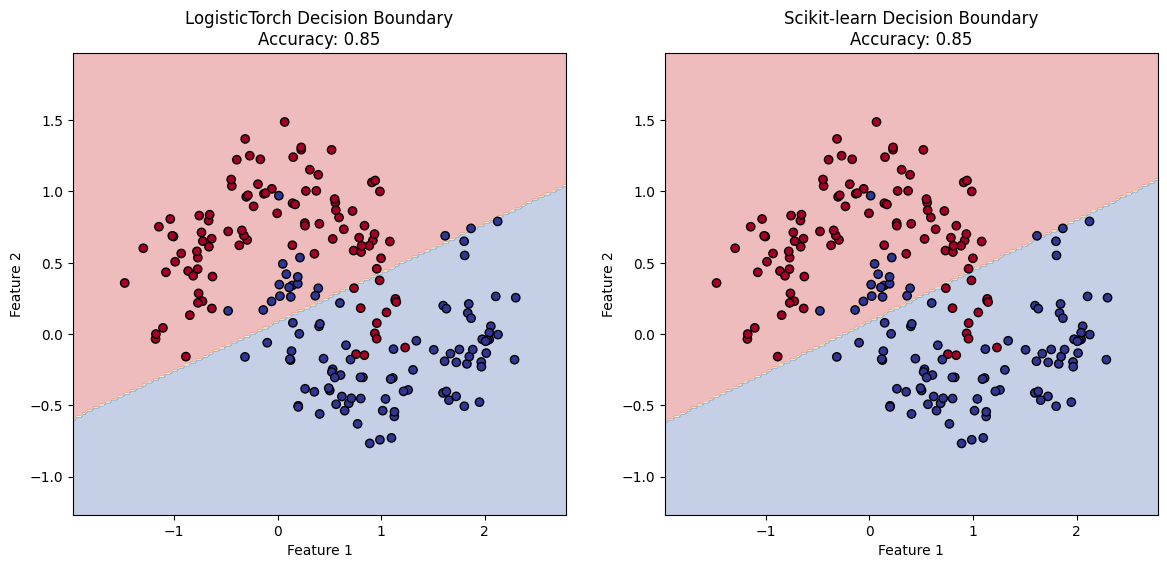

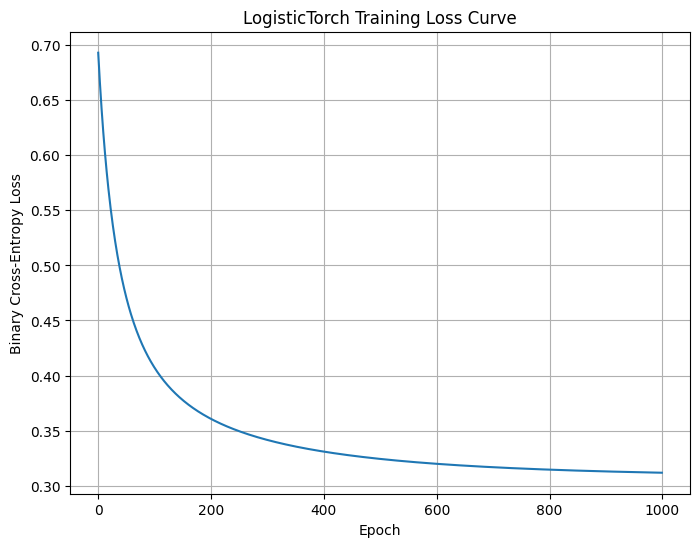

In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z =Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(torch_model, X, y, f'LogisticTorch Decision Boundary\nAccuracy: {torch_accuracy:.2f}')

plt.subplot(1, 2, 2)
plot_decision_boundary(sklearn_model, X, y, f'Scikit-learn Decision Boundary\nAccuracy: {sklearn_accuracy:.2f}')

plt.show()



plt.figure(figsize=(8, 6))
plt.plot(torch_model.losses)
plt.title('LogisticTorch Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)
plt.show()